# LeNet-5

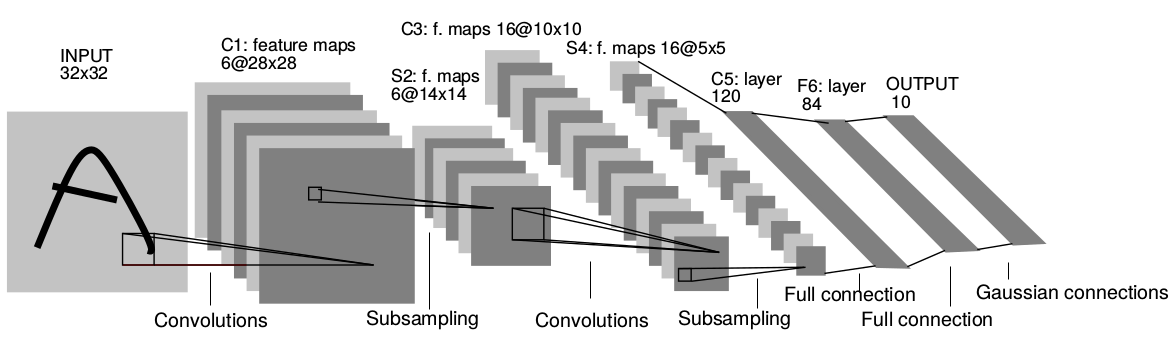

En este codigo se pretende realizar una red neuronal que pueda clasificar digitos escritos a mano. Para ello se usa la arquitectura de $\bf{LeNet-5}$.

In [38]:
#importar librerias 

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D as conv2D
from keras.layers import AveragePooling2D, MaxPooling2D 

%matplotlib inline

In [39]:
#diseno de la red

model = Sequential()
#Layer 1
model.add(conv2D(filters = 6, 
                 kernel_size=(5,5),
                 data_format ='channels_first',
                 activation ='relu', 
                 input_shape=(1,28,28)))

#Layer 2
"""
model.add(AveragePooling2D(pool_size=(14,14),
                           data_format='channels_first'))
"""                    
model.add(MaxPooling2D(pool_size=(2,2), 
                       data_format='channels_first'))


#Layer 3
model.add(conv2D(filters = 16,
                kernel_size = (5,5),
                data_format = 'channels_first',
                activation = 'relu',
                input_shape = (1,14,14)))

#Layer 4
model.add(MaxPooling2D(pool_size=(2,2), 
                       data_format='channels_first'))




In [40]:
model.add(Dropout(0.25))
model.add(Flatten(data_format = 'channels_first'))

In [41]:
#Layer 5
"""
model.add(conv2D(filters = 120,
                kernel_size = (1,1),
                data_format = 'channels_first',
                activation = 'relu'))
"""
model.add(Dense(units = 120,
                activation = 'relu'))

#Layer 6
model.add(Dense(units = 84,
               activation = 'relu'))

#Layer 7
model.add(Dense(units = 10,
               activation = 'softmax'))

In [42]:
from keras.datasets import mnist

In [43]:
# los datos para el entrenamiento y el test

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [44]:
from keras import backend as K

# re-dimensionar mnist

#dimension imagenes de entrada
img_filas, img_columnas = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_filas, img_columnas)
    x_test = x_test.reshape(x_test.shape[0], 1, img_filas, img_columnas)
    input_shape = (1, img_filas, img_columnas)
else:
    x_train = x_train.reshape(x_train.shape[0], img_filas, img_columnas, 1)
    x_test = x_test.reshape(x_test.shape[0], img_filas, img_columnas, 1)
    input_shape = (img_filas, img_columnas, 1)

In [45]:
from keras.utils.np_utils import to_categorical

#Convierte el y_train y y_test en numeros binarios para la comparacion

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [46]:
#Introducir ruido
"""
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
"""

'\nnoise_factor = 0.5\nx_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) \nx_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) \n\nx_train_noisy = np.clip(x_train_noisy, 0., 1.)\nx_test_noisy = np.clip(x_test_noisy, 0., 1.)\n'

In [47]:
"""
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
"""

'\nn = 10\nplt.figure(figsize=(20, 2))\nfor i in range(n):\n    ax = plt.subplot(1, n, i)\n    plt.imshow(x_test_noisy[i].reshape(28, 28))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()\n'

In [48]:
# Ruido agregado a los data test y data train
"""
x_test_noise = x_test + np.random.randint(2, size = x_test.shape)
x_train_noise = x_train + np.random.randint(2, size = x_train.shape)
y_test_noise = y_test + np.random.randint(2, size = y_test.shape)
y_train_noise = y_train + np.random.randint(2, size = y_train.shape)
"""


'\nx_test_noise = x_test + np.random.randint(2, size = x_test.shape)\nx_train_noise = x_train + np.random.randint(2, size = x_train.shape)\ny_test_noise = y_test + np.random.randint(2, size = y_test.shape)\ny_train_noise = y_train + np.random.randint(2, size = y_train.shape)\n'

In [49]:
#a = 
#y_train[a]==y_train_noise[a]

In [50]:
#x_train[0]==x_train_noise[0]

#Se re almacena la variable de entrenamiento por las variables con erros
"""
x_test = x_test_noise
x_train = x_train_noise

y_test = y_test_noise
y_train = y_train_noise
"""

'\nx_test = x_test_noise\nx_train = x_train_noise\n\ny_test = y_test_noise\ny_train = y_train_noise\n'

In [51]:
#y_train[0]

In [52]:
#compilar red neuronal 
from keras.losses import categorical_crossentropy

model.compile(optimizer= 'Adadelta',loss = 'categorical_crossentropy', metrics=['accuracy','mae'])

In [53]:
# entrenamiento

import time 
time_star  = time.time()

model.fit(x_train,
          y_train,
          batch_size = 1000,
          epochs = 10,
          shuffle= True)

time_end = time.time()
time = (time_end-time_star)

print('time training %f [s]'%time)
#print(time)

Epoch 1/10
 8000/60000 [===>..........................] - ETA: 1s - loss: 13.1916 - acc: 0.1485 - mean_absolute_error: 0.1704

/usr/local/lib/python3.5/dist-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001). Is this intended?
  force_init=force_init)


60000/60000 [==============================] - 1s 15us/step - loss: 7.4913 - acc: 0.4350 - mean_absolute_error: 0.1137
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.7587 - acc: 0.8028 - mean_absolute_error: 0.0457
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.4783 - acc: 0.8624 - mean_absolute_error: 0.0337
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.3693 - acc: 0.8921 - mean_absolute_error: 0.0272
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2959 - acc: 0.9120 - mean_absolute_error: 0.0225
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2551 - acc: 0.9241 - mean_absolute_error: 0.0196
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2188 - acc: 0.9347 - mean_absolute_error: 0.0172
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1886 - acc: 0.9426 -

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)

In [55]:
print(score)

[0.09495342414211481, 0.9694, 0.008273389452835544]


## resultados y comparación
### Nota: los resultados en cada ejecución cambia debido al caracter  "euristico" del entrenamiento

$\star$ Dropout $\bf{None}$ - Optimizer = $adam$ - loss = $categorical$_$crossentropy$

    loss: 0.04,  acc: 0.988, time ejecution: 8.8681 [s]

$\star$ Dropout $\bf{True}(0.25)$ - Optimizer = $adam$ - loss = $categorical$_$crossentropy$

    loss: 0.07,  acc: 0.977, time ejecution: 9.1025 [s]

$\star$ Dropout $\bf{True}(0.5)$ - Optimizer = $adam$ - loss = $categorical$_$crossentropy$

    loss: 0.08,  acc: 0.971, time ejecution: 9.0951 [s]

----------------------------------------------------------------------------------------------------
$\star$ Dropout $\bf{None}$ - Optimizer = $adadelta$ - loss = $categorical$_$crossentropy$

    loss: 0.15,  acc: 0.965, time ejecution: 9.5474 [s]

$\star$ Dropout $\bf{True}(0.25)$ - Optimizer = $adadelta$ - loss = $categorical$_$crossentropy$

    loss: 0.09,  acc: 0.972, time ejecution: 9.9389 [s]

$\star$ Dropout $\bf{True}(0.5)$ - Optimizer = $adadelta$ - loss = $categorical$_$crossentropy$

    loss: 0.11,  acc: 0.963 , time ejecution: 9.8424 [s]

----------------------------------------------------------------------------------------------------

$\star$ Dropout $\bf{True}(0.5)$ - Optimizer = $adam$ - loss = $mean\_squared\_error$

    loss: 0.02,  acc: 0.852, time ejecution: 9.8391 [s]

$\star$ Dropout $\bf{True}(0.25)$ - Optimizer = $adam$ - loss = $mean\_squared\_logarithmic\_error$

    loss: 0.003,  acc: 0.956, time ejecution: 9.8044 [s]

$\star$ Dropout $\bf{True}(0.25)$ - Optimizer = $adam$ - loss = $poisson$

    loss: 0.109,  acc:0.9704 , time ejecution: 9.8436 [s]



In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 24, 24)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 12, 12)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 8, 8)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 4, 4)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 4, 4)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
__________

# Definitions

$\bf{binary\_accuracy:}$  Calculates the mean accuracy rate across all predictions for binary classification problems.

$\bf{categorical\_accuracy:}$ Calculates the mean accuracy rate across all predictions for multiclass classification problems.

$\bf{mse:}$ Calculates the mean absolute error (mae) rate between predicted and target values.

$\bf{mape:}$ Calculates the mean absolute percentage error (mape) rate between predicted and target values.

$\bf{mae:}$ Calculates the mean absolute error (mae) rate between predicted and target values.

for see most definitions (https://github.com/keras-team/keras/blob/c2e36f369b411ad1d0a40ac096fe35f73b9dffd3/keras/metrics.py)

    